# Integration & Cointegration

(Sourced from: https://github.com/Auquan/Tutorials/blob/master/Integration%2C%20Cointegration%2C%20and%20Stationarity.ipynb)

## Order of Integration

### Moving Average Representation

An important concept in time series analysis is moving average representation. We will discuss this briefly here, but a more complete explanation is available in the AR, MA and ARMA Models sheets. Also check Wikipedia as listed below.

This representation expresses any time series $Y_t$ as

$$Y_t = \sum_{j=0}^\infty b_j \epsilon_{t-j} + \eta_t$$

- $\epsilon$ is the residuals or errors - a stochastic white noise process
- $b_j$ are the moving average weights of residuals
- $\eta$ is a deterministic series

$\eta$ is deterministic (such as a sine wave),something we could perfectly model it. The difference between predictions from this model ($\eta$) and actual observations leads to residuals($\epsilon$). The residuals are stochastic and there to simulate new information occuring over time.

Specifically, $\epsilon_t = \hat Y_t - Y_t$ where $\hat Y_t$ is the in the optimal forecast of $Y_t$(actual observed value) using only information from time before $t$. In other words, the best prediction you can make at time $t-1$ cannot account for the randomness in $\epsilon$.

Each $b_j$ just says how much previous values of $\epsilon$ influence $Y_t$.

### Back to Order of Integration

We will note integration order-i as $I(i)$.

A time series is said to be $I(0)$ if the following condition holds in a moving average representation. In simpler terms, the autocorrelation of the series decays to 0 sufficiently quickly.

$$\sum_{k=0} ^\infty |b_k|^2 \lt \infty$$

This property turns out to be true of all stationary series since autocorrelation is 0, but by itself is not enough for stationarity to hold. This means that stationarity implies $I(0)$, but $I(0)$ does not imply stationarity. For more on orders of integration, please see the following links.

https://en.wikipedia.org/wiki/Order_of_integration

https://en.wikipedia.org/wiki/Wold%27s_theorem


### Testing for $I(0)$

In practice testing whether the sum of the autocorrelations is finite may not be possible. It is possible in a mathematical derivation, but when we have a finite set of data and a finite number of estimated autocorrelations, the sum will always be finite. Given this difficulty, tests for $I(0)$ rely on stationarity implying the property. If we find that a series is stationary, then it must also be $I(0)$.

Let's take a stationary series A. Because A is stationary, we know it's also $I(0)$.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# function to generate made up signals
def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

In [3]:
# function to check for stationarity via ADF
def check_for_stationarity(X, cutoff=0.01):
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')
        return False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


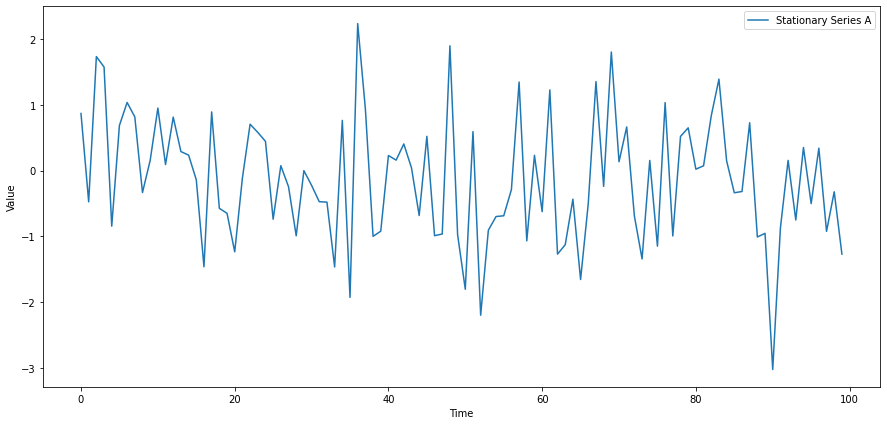

p-value = 8.098975694094343e-18 The series A is likely stationary.


True

In [4]:
# signal A (stationary)
params = (0, 1) # mean and standard deviation
T = 100 # number of datapoints

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_datapoint(params)

plt.figure(figsize=(15,7))
plt.plot(A)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Stationary Series A'])
plt.show()
check_for_stationarity(A)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


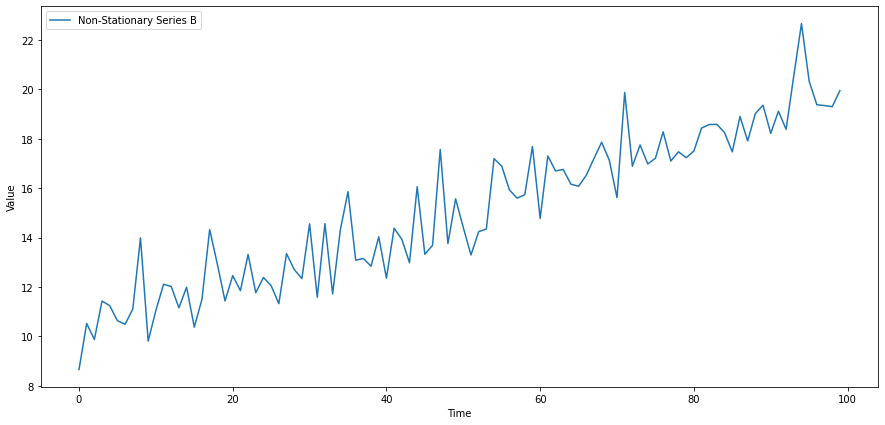

p-value = 0.9944547935290607 The series B is likely non-stationary.


False

In [5]:
# series B (non-stationary)
T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (10 + t * 0.1, 1)
    B[t] = generate_datapoint(params)

plt.figure(figsize=(15,7))
plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Non-Stationary Series B'])
plt.show()
check_for_stationarity(B)

### Building Up Orders of Integration

If one takes an $I(0)$ series and cumulatively sums it (discrete integration), the new series will be $I(1)$. Notice how this is related to the calculus concept of integration. The same relation applies in general, to get $I(n)$ take an $I(0)$ series and iteratively take the cumulative sum $n$ times.

Now let's make an $I(1)$ series by taking the cumulative sum of A.

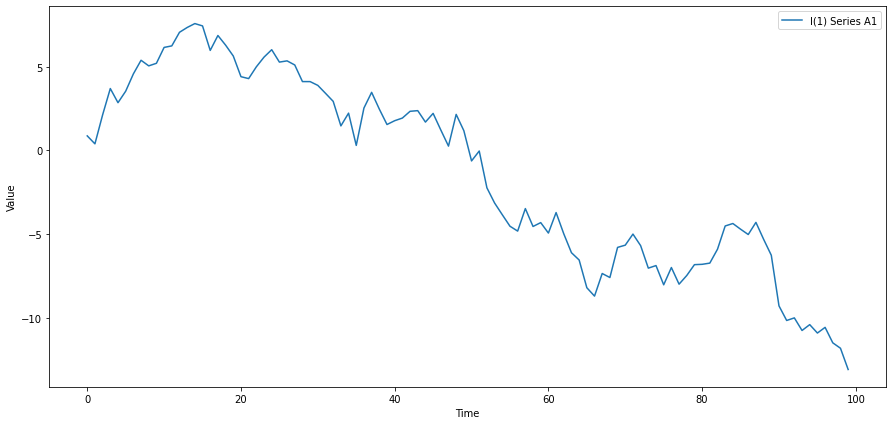

In [6]:
A1 = np.cumsum(A)

plt.figure(figsize=(15,7))
plt.plot(A1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['I(1) Series A1'])
plt.show()

Now let's make an $I(2)$ series by taking the cumulative sum of A1 which was $I(2)$.

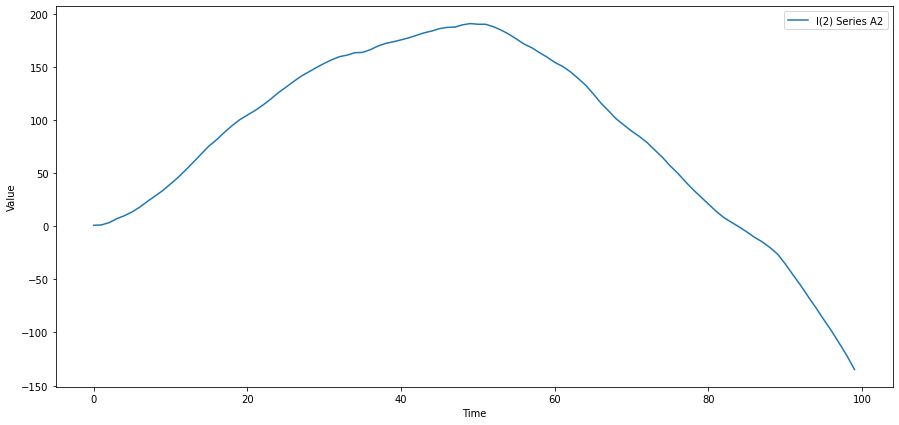

In [7]:
A2 = np.cumsum(A1)

plt.figure(figsize=(15,7))
plt.plot(A2)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['I(2) Series A2'])
plt.show()

Now let's make an $I(100)$ series.

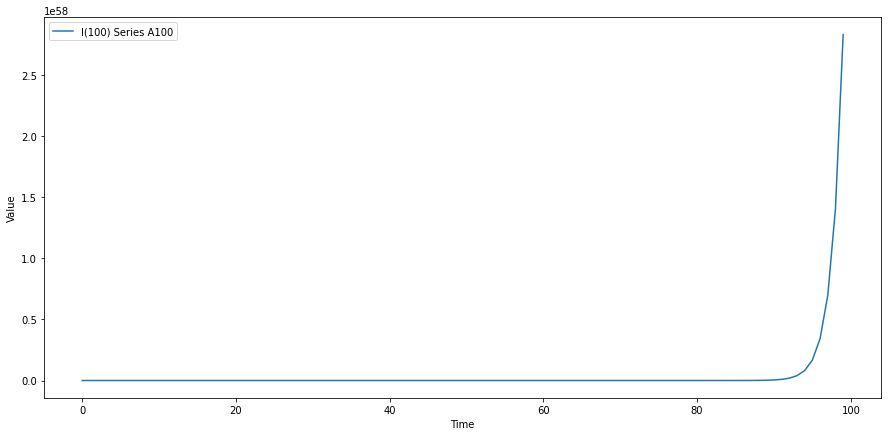

In [8]:
A100 = A

for i in range(0, 100, 1):
  A100 = np.cumsum(A100)

plt.figure(figsize=(15,7))
plt.plot(A100)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['I(100) Series A100'])
plt.show()

### Breaking Down Orders of Integration

Conversely, to find the order of integration of a given series, we perform the inverse of a cumulative sum, which is the $\Delta$ of itemwise difference function. Specifically:

$$ (1-L) X_{t} = X_{t} - X_{t-1} = \Delta X$$
$$ (1-L)^{d} X_{t} $$

In this case $L$ is the lag operator. Sometimes also written as $B$ for "backshift". $L$ fetches the second to last elements in a time series, and $L^{k}$ fetches the k-th to last elements. In other words, if $L$ is applied to any member of a time series, it immediately outputs the previous element of that time series. So:

$$ LX_{t} = X_{t-1} $$
$$ (1-L) X_{t} = X_{t} - X_{t-1} $$

A series $Y_{t}$ is $I(1)$ if the $Y_{t} - Y_{t-1}$ is $I(0)$. In other words, if you take an $I(0)$ series and cumulatively sum it, you should get an $I(1)$ series.

If you have an $I(n)$ time series and you take the first order differences n times, the you are going to get a series that is $I(0)$.

Let's try this out on non-stationary signal B, which looked a bit like an $I(1)$ time series.


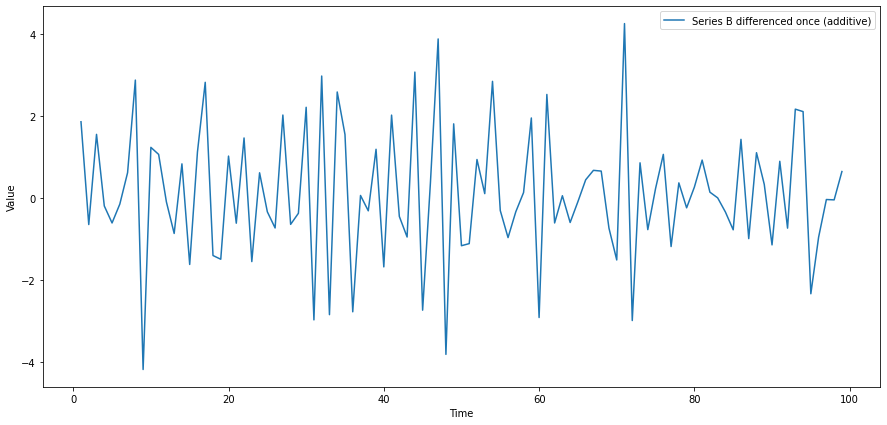

p-value = 1.8943987221644655e-06 The series BAdditive Returns is likely stationary.


True

In [9]:
# difference series B (taking the delta) via additive returns
B1 = B.diff()[1:]
B1.name = B.name + "Additive Returns"

plt.figure(figsize=(15,7))
plt.plot(B1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B differenced once (additive)'])
plt.show()

check_for_stationarity(B1)

Seems like the additive returns are stationary. That means we will probably be able to model the returns much better than the price. It also means that the price was $I(1)$.

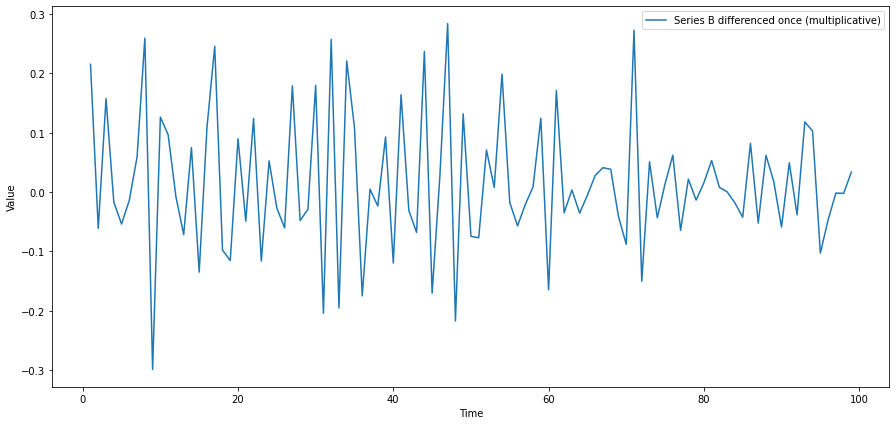

p-value = 7.48472418279104e-11 The series BMultiplicative Returns is likely stationary.


True

In [10]:
# difference series B (taking the delta) via multiplicative returns
B1 = B.pct_change()[1:]
B1.name = B.name + "Multiplicative Returns"

plt.figure(figsize=(15,7))
plt.plot(B1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B differenced once (multiplicative)'])
plt.show()

check_for_stationarity(B1)


Seems like the multiplicative returns are also stationary. Both the multiplicative and additive deltas on a series get at similar pieces of information, so it's not surprising both are stationary. In practice this might not always be the case.

### IMPORTANT NOTE
As always, you should not naively assume that because a time series is stationary in the past it will continue to be stationary in the future. Tests for consistency of stationarity such as cross validation and out of sample testing are necessary. This is true of any statistical property, we just reiterate it here. Returns may also go in and out of stationarity, and may be stationary or non-stationary depending on the timeframe and sampling frequency.

###Note: Returns Analysis
The reason returns are usually used for modeling in quantitive finance is that they are far more stationary than prices. This makes them easier to model and returns forecasting more feasible. Forecasting prices is more difficult, as there are many trends induced by their $I(1)$ integration. Even using a returns forecasting model to forecast price can be tricky, as any error in the returns forecast will be magnified over time.

## Cointegration

A linear combination of the time series ($X_1$, $X_2$, $\dots$, $X_k$) is a new time series $Y$ constructed as follows for any set of real numbers $b_1 \dots b_k$

$$Y = b_1X_1 + b_2X_2 + \dots + b_kX_k$$

For some set of time series ($X_1$, $X_2$, $\dots$, $X_k$), if all series are $I(1)$, and some linear combination of them is $I(0)$, we say the set of time series is cointegrated.

For example, $X_1$, $X_2$, and $X_3$ are all $I(1)$, and $2X_1 + X_2 + 0X_3 = 2X_1 + X_2$ is $I(0)$. In this case the time series are cointegrated.

### Intuition
The intuition here is that for some linear combination of the series, the result lacks much auto-covariance and is mostly noise. This is useful for cases such as pairs trading, in which we find two assets whose prices are cointegrated. Since the linear combination of their prices $b_1A_1 + b_2A_2$ is noise, we can bet on the relationship $b_1A_1 + b_2A_2$ mean reverting and place trades accordingly.

Let's make some data to demonstrate this.

In [11]:
# Length of series
N = 100

# Generate a stationary random X1
X1 = np.random.normal(0, 1, N)
# Integrate it to make it I(1)
X1 = np.cumsum(X1)
X1 = pd.Series(X1)
X1.name = 'X1'

# Make an X2 that is X1 plus some noise
X2 = X1 + np.random.normal(0, 1, N)
X2.name = 'X2'

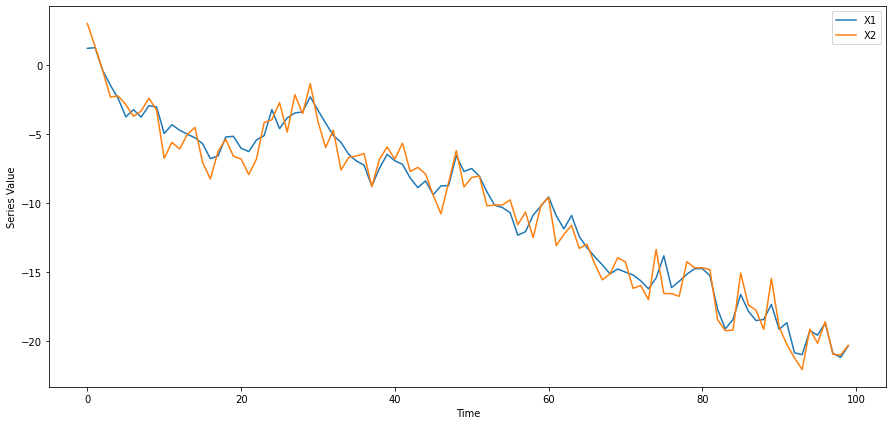

In [12]:
plt.figure(figsize=(15,7))
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name])
plt.show()

Because $X_2$ is just an $I(1)$ series plus some stationary noise, it should still be $I(1)$. Let's check this.

In [13]:
Z = X2.diff()[1:]
Z.name = 'Z'
check_for_stationarity(Z)

p-value = 7.00948109298787e-05 The series Z is likely stationary.


True

Looks good. Now to show cointegration we'll need to find some linear combination of $X_1$ and $X_2$ that is stationary. We can take $X_2-X_1$. All that's left over should be stationary noise by design. Let's check this.

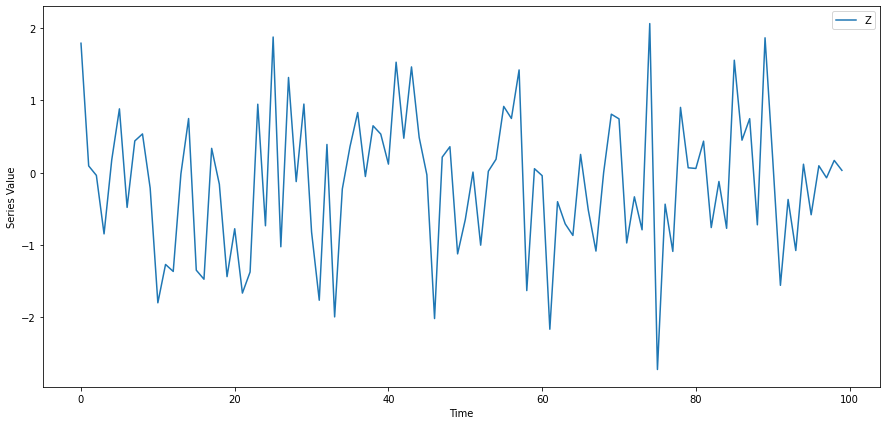

p-value = 2.1318237660067124e-18 The series Z is likely stationary.


In [14]:
Z = X2 - X1
Z.name = 'Z'

plt.figure(figsize=(15,7))
plt.plot(Z)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(['Z'])
plt.show()

check_for_stationarity(Z);

### Testing for Cointegration

There are a bunch of ways to test for cointegration. This [wikipedia](https://en.wikipedia.org/wiki/Cointegration) article describes some. In general we're just trying to solve for the coefficients $b_1, \dots b_k$ that will produce an $I(0)$ linear combination. If our best guess for these coefficients does not pass a stationarity check, then we reject the hypothesis that the set is cointegrated. This will lead to risk of Type II errors (false negatives), as we will not exhaustively test for stationarity on all coefficent combinations. However Type II errors are generally okay here, as they are safe and do not lead to us making any wrong forecasts.

In practice a common way to do this for pairs of time series is to use linear regression to estimate $\beta$ in the following model.

$$X_2 = \alpha + \beta X_1 + \epsilon$$
The idea is that if the two are cointegrated we can remove $X_2$'s depedency on $X_1$, leaving behind stationary noise. The combination $X_2 - \beta X_1 = \alpha + \epsilon$ should be stationary.

Let's try on some real data. We'll get prices and plot them first.

### Real stock data example

In [15]:
pip install yfinance

In [16]:
# import stock fetching library
import yfinance as yf

In [17]:
# load data
tickers = ["PG", "BEI.DE"]
df = yf.download(tickers=tickers, start="2016-01-01", end="2017-01-01", group_by="ticker", auto_adjust=True)
df

[*********************100%***********************]  2 of 2 completed


BEI.DE                        ...         PG                       
                 Open       High        Low  ...        Low      Close      Volume
Date                                         ...                                  
2016-01-04  78.657856  78.657856  76.806856  ...  65.511522  66.212769  11529800.0
2016-01-05  78.209415  78.581522  77.522445  ...  66.077572  66.423973   8133700.0
2016-01-06  77.780070  77.808700  76.463384  ...  65.156678  65.781883   9551000.0
2016-01-07  75.986312  76.329797  74.555128  ...  64.269534  65.207344  11973900.0
2016-01-08  75.432914  76.759144  74.936774  ...  63.931586  64.185051   9676400.0
...               ...        ...        ...  ...        ...        ...         ...
2016-12-23  77.596436  77.962227  77.529053  ...  73.781519  74.139297   5284200.0
2016-12-27  77.942963  78.241371  77.904457  ...  73.668074  73.825150   3782600.0
2016-12-28  77.933342  78.077736  77.567551  ...  73.257929  73.362648   4298800.0
2016-12-29  77.625305  78.308762  77.625305  ...  73.388835  73.606995   3718300.0
2016-12-30  78.193252  78.337638  77.586800  ...  73.231766  73.371391   6209800.0

[258 rows x 10 columns]

In [18]:
# get close prices
close_df = df.copy()
close_df = close_df.loc[:, close_df.columns.get_level_values(1)=="Close"].fillna(method="ffill")
close_df.columns = close_df.columns.get_level_values(0)
close_df

,BEI.DE,PG
Date,,
2016-01-04,77.398415,66.212769
2016-01-05,78.238037,66.423973
2016-01-06,77.732368,65.781883
2016-01-07,75.833656,65.207344
2016-01-08,75.642822,64.185051
...,...,...
2016-12-23,77.798584,74.139297
2016-12-27,78.116234,73.825150
2016-12-28,77.991096,73.362648


In [19]:
# create separate series for each stock
X1 = close_df.loc[:, "PG"]
X2 = close_df.loc[:, "BEI.DE"]

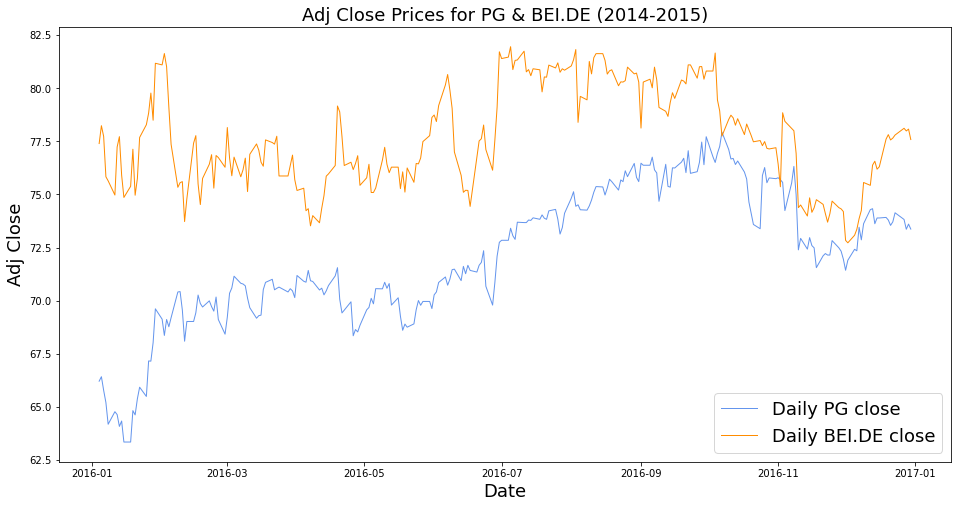

In [20]:
# plot two stocks
plt.figure(figsize=(16,8))
plt.plot(X1.index, X1.values, alpha=1.0, label="Daily PG close", linewidth=1, color="cornflowerblue", zorder=1)
plt.plot(X2.index, X2.values, alpha=1.0, label="Daily BEI.DE close", linewidth=1, color="darkorange", zorder=1)
plt.legend(fontsize=18)
plt.title("Adj Close Prices for PG & BEI.DE (2014-2015)", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()

Now use linear regression to compute $\beta$.

In [21]:
# OLS regression for beta
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

# Get rid of the constant column
X1 = X1['PG']

results.params

const    52.198171
PG        0.353493
dtype: float64

So $\beta$ (of BEI.DE with respect to PG) is around 0.35

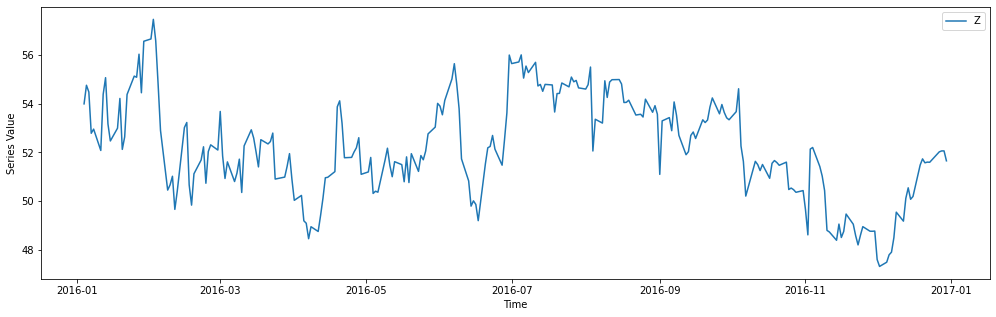

p-value = 0.0032241974087431316 The series Z is likely stationary.


True

In [22]:
b = results.params['PG'] # beta
Z = X2 - b * X1 # linear combination
Z.name = 'Z'

plt.figure(figsize=(17,5))
plt.plot(Z.index, Z.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

check_for_stationarity(Z)

We can see here that the resulting $Z$ was likely stationary over the time frame we looked at. This causes us to accept the hypothesis that our two assets were cointegrated over the same timeframe.

### This is only a forecast!

Remember as with anything else, you should not assume that because some set of assets have passed a cointegration test historically, they will continue to remain cointegrated. You need to verify that consistent behavior occurs, and use various model validation techniques as you would with any model.

One of the most important things done in finance is to make many independent bets. Here a quant would find many pairs of assets they hypothesize are cointegrated, and evenly distribute their dollars between them in bets. This only requires more than half of the asset pairs to remain cointegrated for the strategy to work.

Look for stocks in closely related or same industries, or stocks that have business relations or competitions with each other!

Luckily there are some pre-built tests for cointegration. Here's one. Read up on the [documentation](https://www.statsmodels.org/devel/_modules/statsmodels/tsa/stattools.html).

In [23]:
coint(X1, X2)

(-2.322469036679849,
 0.3623961491215095,
 array([-3.939562  , -3.36000801, -3.06099391]))

In [24]:
coint?

**The p-value of the cointegration test is 0.36>0.05 and hence the stocks are actually not cointegrated!**